IMPORTING LIBRARIES


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('/content/salary.csv')

In [ ]:
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [ ]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [ ]:
print('Shape of Dataset:', df.shape)

Shape of Dataset: (2639, 13)


DATA PREPROCESSING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


NAN VALUES

In [ ]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [ ]:
# Drop Records That Contain Only Nan Values
df.dropna(inplace=True)

# Check Again For Nan Values
df.isna().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

DUPLICATES

In [ ]:
df.duplicated().sum()

161

In [ ]:
df[df.duplicated()].head(15)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
104,CARI,ARENALES,F,04-10-2014,01-07-2016,Senior Analyst,28.0,66338,Web,24.0,6.0,3.0,5
248,BOBBIE,AIDT,M,6-29-2013,01-07-2016,Senior Analyst,25.0,68505,Operations,15.0,15.0,3.0,1
400,JUAN,ABBASSI,M,07-01-2013,01-07-2016,Senior Analyst,27.0,61575,Finance,20.0,10.0,2.0,1
422,JODIE,ANIELLO,F,10-29-2014,01-07-2016,Analyst,24.0,43137,IT,27.0,3.0,2.0,2
446,ALEX,ABOLAFIA,M,11-10-2013,01-07-2016,Analyst,25.0,43352,Finance,27.0,3.0,4.0,2
477,EMILY,ALTHISER,F,2-26-2013,01-07-2016,Senior Analyst,26.0,65316,Marketing,21.0,9.0,5.0,0
544,THEODORA,ARENT,F,06-09-2012,01-07-2016,Senior Analyst,28.0,55693,Management,15.0,15.0,2.0,2
566,FRANKIE,ANETSBERGER,F,1-28-2014,01-07-2016,Analyst,23.0,45704,Finance,24.0,6.0,4.0,0
571,PAULETTE,ANACKER,F,5-16-2013,01-07-2016,Analyst,23.0,45579,Marketing,30.0,0.0,4.0,0
595,DEMETRIA,ARECHIGA,F,7-25-2014,01-07-2016,Analyst,25.0,46808,Web,19.0,11.0,3.0,3


In [ ]:
# Drop Duplicates Records
df.drop_duplicates(inplace=True)

# Reset Our Index to be Orderd
df.reset_index(inplace=True, drop=True)

df.duplicated().sum()

0

In [ ]:
df['AGE'] = df['AGE'].astype(int)
df['RATINGS'] = df['RATINGS'].astype(int)


In [ ]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21,44570,Finance,24.0,6.0,2,0
1,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21,40955,Finance,23.0,7.0,3,0
2,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22,45550,IT,22.0,8.0,3,0
3,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,22,40339,Marketing,19.0,11.0,5,0
4,KATHY,ALSOP,F,6-29-2014,01-07-2016,Senior Analyst,28,63478,Operations,20.0,10.0,3,1


In [ ]:
df['RATINGS'].unique()

array([2, 3, 5, 4])

In [ ]:
df['DESIGNATION'].unique()

array(['Analyst', 'Senior Analyst', 'Associate', 'Senior Manager',
       'Manager', 'Director'], dtype=object)

In [ ]:

# Dictionary to map old values to new values
designation_mapping = {
    'Analyst': 'Entry Level',
    'Senior Analyst': 'Senior'
}

# Replace the values in the 'DESIGNATION' column
df['DESIGNATION'] = df['DESIGNATION'].replace(designation_mapping)

# Display the DataFrame to check the changes
df['DESIGNATION'].unique()


array(['Entry Level', 'Senior', 'Associate', 'Senior Manager', 'Manager',
       'Director'], dtype=object)

In [ ]:
df['UNIT'].unique()

array(['Finance', 'IT', 'Marketing', 'Operations', 'Web', 'Management'],
      dtype=object)

In [ ]:
df['PAST EXP'].unique()

array([ 0,  1,  2,  3, 13,  5,  9,  6, 10,  4, 12, 18, 11,  8, 17,  7, 14,
       19, 23, 15, 16])

In [ ]:
df.head(1)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Entry Level,21,44570,Finance,24.0,6.0,2,0


In [ ]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

In [ ]:
columns_to_remove = ['FIRST NAME', 'LAST NAME', 'CURRENT DATE', 'DOJ', 'LEAVES USED', 'LEAVES REMAINING',]

# Dropping the columns
df.drop(columns=columns_to_remove, inplace=True)



In [ ]:
df.head(5)

,SEX,DESIGNATION,AGE,SALARY,UNIT,RATINGS,PAST EXP
0,F,Entry Level,21,44570,Finance,2,0
1,F,Entry Level,21,40955,Finance,3,0
2,F,Entry Level,22,45550,IT,3,0
3,M,Entry Level,22,40339,Marketing,5,0
4,F,Senior,28,63478,Operations,3,1


OUTLIERS

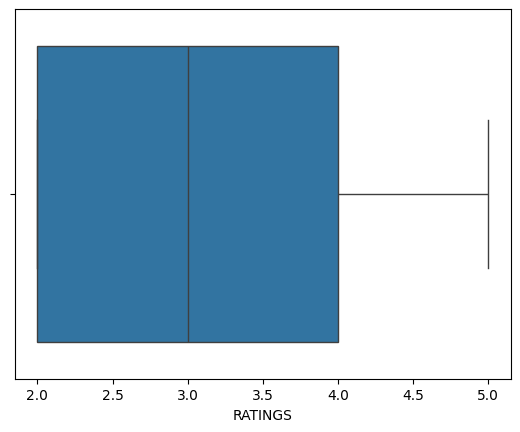

In [ ]:
sns.boxplot(x = "RATINGS", data=df)
plt.show()


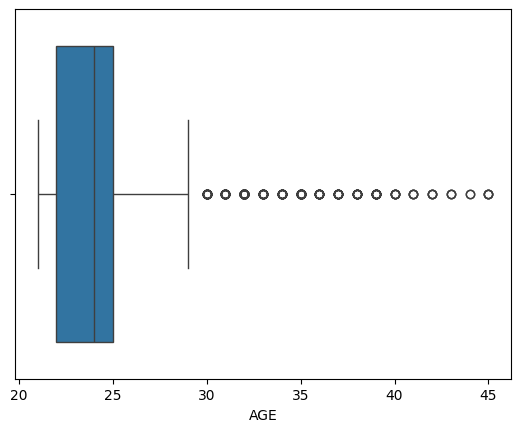

In [ ]:
sns.boxplot(x = "AGE", data=df)
plt.show()

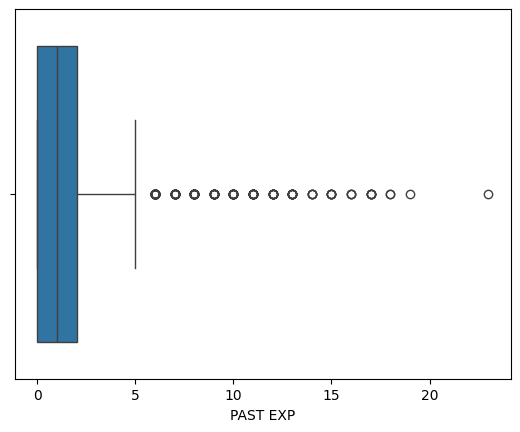

In [ ]:
sns.boxplot(x = "PAST EXP", data=df)
plt.show()

DATA VISUALIZATION

In [ ]:
gender = df["SEX"].value_counts(normalize=1) * 100
gender.apply(lambda x: f"{x:0.2f}%")

SEX
F    50.81%
M    49.19%
Name: proportion, dtype: object

Is there a significant difference in average salary between men and women in this dataset?

In [ ]:
salary_by_gender = df.groupby("SEX")["SALARY"].mean().sort_values(ascending=False)
salary_by_gender.apply(lambda x: f"${x:,.2f}")


SEX
F    $58,998.42
M    $57,082.08
Name: SALARY, dtype: object

In [ ]:

fig = px.bar(data_frame = salary_by_gender,
             x = salary_by_gender.index,
             y = salary_by_gender,
             color = salary_by_gender.index,
             title = "AVG Salary By Gender👨👩",
             color_discrete_sequence=["#45FFCA", "#D09CFA", "#FF9B9B"],
             labels= {"index" :"Education", "y": "Frequency in PCT(%)"},
             template="plotly_dark",
             text_auto = "0.4s"
            )




fig.update_traces(
    textfont = {
        "size" : 16,
        "family" :"arial",
        "color": "#222"
    },
    hovertemplate = "SEX: %{x}Average Salary: $%{y:0.4s}",
)
iplot(fig)

In [ ]:
df.head(1)

,SEX,DESIGNATION,AGE,SALARY,UNIT,RATINGS,PAST EXP
0,F,Entry Level,21,44570,Finance,2,0


Is there a statistically significant relationship between job designation and salary?

In [ ]:
salary_by_designation = df.groupby("DESIGNATION")["SALARY"].mean().sort_values(ascending=False)
salary_by_designation.apply(lambda x: f"${x:,.2f}")

DESIGNATION
Director          $294,784.56
Senior Manager    $178,785.62
Manager           $126,012.62
Associate          $87,074.88
Senior             $59,956.56
Entry Level        $45,028.62
Name: SALARY, dtype: object

In [ ]:
fig = px.bar(data_frame = salary_by_designation,
             x = salary_by_designation.index,
             y = salary_by_designation,
             color = salary_by_designation.index,
             title = "AVG Salary Via Designation💵",
             color_discrete_sequence=["#45FFCA", "#D09CFA", "#FF9B9B"],
             labels= {"index" :"DESIGNATION", "y": "Frequency in PCT(%)"},
             template="plotly_dark",
             text_auto = "0.4s"
            )



fig.update_traces(
    textfont = {
        "size" : 16,
        "family" :"arial",
        "color": "#222"
    },
    hovertemplate = "DESIGNATION: %{x}Average Salary: $%{y:0.4s}",
)

iplot(fig)

How years of experience influence the salary?

In [ ]:
# To Convert Years of Experience into 5 Catefoty
def groupping_exp(exp):
    if exp >= 0 and exp <= 5:
        return "0-5 years"
    elif exp > 5 and exp <= 10:
        return "6-10 years"
    elif exp > 10 and exp <= 15:
        return "11-15 years"
    elif exp > 15 and exp <= 20:
        return "16-20 years"
    else:
        return "20+"


In [ ]:
salary_by_exp = df.groupby(df["PAST EXP"].apply(groupping_exp))["SALARY"].mean().sort_values(ascending=False)
salary_by_exp.apply(lambda x: f"${x:,.2f}")


PAST EXP
16-20 years    $275,309.64
20+            $253,284.00
11-15 years    $210,224.54
6-10 years     $128,277.87
0-5 years       $49,717.51
Name: SALARY, dtype: object

In [ ]:
fig = px.bar(data_frame = salary_by_exp,
             x = salary_by_exp.index,
             y = salary_by_exp,
             color = salary_by_exp.index,
             title = "AVG Salary By Years of Experience💵",
             color_discrete_sequence=["#45FFCA", "#D09CFA", "#FF9B9B", "#F875AA", "#3EDBF0"],
             labels= {"index" :"Education", "y": "Frequency in PCT(%)"},
             template="plotly_dark",
             text_auto = "0.4s"
            )




fig.update_traces(
    textfont = {
        "size" : 16,
        "family" :"arial",
        "color": "#222"
    },
    hovertemplate = "PAST EXP: %{x}Average Salary: $%{y:0.4s}",
)

In [ ]:
salary_by_unit = df.groupby("UNIT")["SALARY"].mean().sort_values(ascending=False)
salary_by_unit.apply(lambda x: f"${x:,.2f}")


UNIT
Marketing     $59,212.69
IT            $59,182.72
Management    $59,063.95
Finance       $58,130.89
Web           $57,158.69
Operations    $55,550.00
Name: SALARY, dtype: object

In [ ]:

fig = px.bar(data_frame = salary_by_unit,
             x = salary_by_unit.index,
             y = salary_by_unit,
             color = salary_by_unit.index,
             title = "AVG Salary Via Business Unit💵",
             color_discrete_sequence=["#45FFCA", "#D09CFA", "#FF9B9B"],
             labels= {"index" :"UNIT", "y": "Frequency in PCT(%)"},
             template="plotly_dark",
             text_auto = "0.4s"
            )



fig.update_traces(
    textfont = {
        "size" : 16,
        "family" :"arial",
        "color": "#222"
    },
    hovertemplate = "UNIT: %{x}Average Salary: $%{y:0.4s}",
)

iplot(fig)


Correlation HeatMap & Charts 👩‍💻📈

In [ ]:
df.head(1)


,SEX,DESIGNATION,AGE,SALARY,UNIT,RATINGS,PAST EXP
0,F,Entry Level,21,44570,Finance,2,0


In [ ]:
df[['AGE','SALARY', 'RATINGS', 'PAST EXP']].corr()

,AGE,SALARY,RATINGS,PAST EXP
AGE,1.000000,0.869357,0.033534,0.903694
SALARY,0.869357,1.000000,0.016123,0.851026
RATINGS,0.033534,0.016123,1.000000,0.036397
PAST EXP,0.903694,0.851026,0.036397,1.000000


<Axes: >

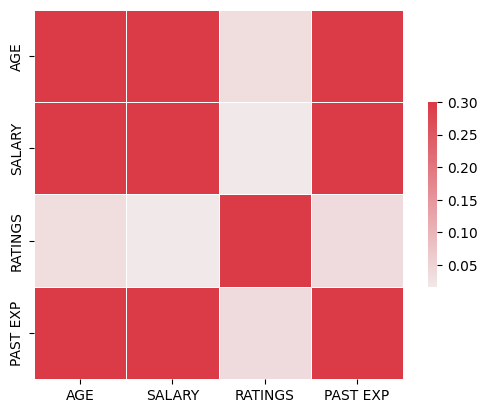

In [ ]:
cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(df[['AGE','SALARY', 'RATINGS', 'PAST EXP']].corr(), vmax=.3, center=0, cmap=cmap,
           square=True, linewidths=0.5, cbar_kws = {'shrink': .5})


In [ ]:
fig = px.scatter_matrix(
    df,
    dimensions=df.select_dtypes(include="number").columns,
    height=800,
    color="SALARY",
    opacity=0.65,
    title= "Relationships Between Numerical Data",
    template="plotly_dark"

)

fig.update_layout(
    title = {
        "font" :{
            "size" : 28,
            "family" : "tahoma"
        }
    }
)
iplot(fig)

► From Thses Graphs & Explorations We Can Find Out That:

• There is a Strong Linear Positive Correlation between Salary and Age

• There is a Strong Linear Positive Correlation between Salary and Past Exp

TRAINING THE MODEL
One-hot encode the 'DESIGNATION' column

In [ ]:
df_encoded = pd.get_dummies(df, columns=['DESIGNATION'], drop_first=True)


Drop columns that are not needed for prediction

In [ ]:
X = df_encoded.drop(columns=["UNIT", "SALARY", "SEX", 'RATINGS'])
y = df_encoded["SALARY"]


In [ ]:
X.head()

,AGE,PAST EXP,DESIGNATION_Director,DESIGNATION_Entry Level,DESIGNATION_Manager,DESIGNATION_Senior,DESIGNATION_Senior Manager
0,21,0,False,True,False,False,False
1,21,0,False,True,False,False,False
2,22,0,False,True,False,False,False
3,22,0,False,True,False,False,False
4,28,1,False,False,False,True,False


In [ ]:
y.head()

0    44570
1    40955
2    45550
3    40339
4    63478
Name: SALARY, dtype: int64

Splitting Our Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train the model

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
RandomForestRegressor(random_state=42)

RandomForestRegressor(random_state=42)

Evaluate the model

In [ ]:
y_pred = model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))


Mean Absolute Error: 4543.831341754263
Mean Squared Error: 108689834.48833296
R^2 Score: 0.9162970522812992


Save the model

In [ ]:
import pickle
with open('salary_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
with open('one_hot_columns.pkl', 'wb') as file:
    pickle.dump(X.columns.tolist(), file)

Download the files

In [ ]:
from google.colab import files

files.download('salary_prediction_model.pkl')
files.download('one_hot_columns.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import sklearn
print(sklearn.__version__)



1.2.2
